# **Ajustando hiperparámetros de una red neuronal multicapa MLP**

In [2]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
# generamos algunos datos aleatoriamente:

X, y = make_classification(n_samples=10_000, n_features=20, n_informative=15, n_redundant=5, random_state=1, flip_y=0.13)

print(X.shape, y.shape)

(10000, 20) (10000,)


In [9]:
y.sum()

np.int64(5019)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [11]:
# Generemos nuestras curvas de aprendizaje de manera manual:

values = [i for i in range(1, 100, 10)]

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()


for i in values:

  # podemos usar un árbol de decisiones, viendo como se comporta con respecto a
  # la profundidad máxima del árbol ....
  #model = DecisionTreeClassifier(max_depth=i)

  # ... o bien una red neuronal y ver cómo se comporta con el número de
  # neuronas en la o las capas ocultas....
  #model = MLPClassifier(hidden_layer_sizes=(i,), max_iter=1000)

  ii = round((i+1)/2.)
  model = MLPClassifier(hidden_layer_sizes=(i,ii), max_iter=1000)  # aquí puedes también variar las neuronas en dos capas...

  # Ajuste:
  model.fit(X_train, y_train)

  # Predicciones:
  train_yhat = model.predict(X_train)

  train_performance = accuracy_score(y_train, train_yhat)   # puedes elegir el accuracy....
  #train_performance = f1_score(y_train, train_yhat)          # o bien, cualquiera de las otras métricas, como aquí la f1-score
  train_scores.append(train_performance)  # monitoreamos los desempeños de Train

  loss_train =  sum(pow(y_train - train_yhat, 2)) / y_train.shape[0]  # error. podemos definir el error deseado
  train_errors.append(loss_train)   # monitoreamos los errores de Train



  # métricas del Test:
  test_yhat = model.predict(X_test)

  test_performance = accuracy_score(y_test, test_yhat)
  #test_performance = f1_score(y_test, test_yhat)
  test_scores.append(test_performance)   # ####################

  loss_test =  sum(pow(y_test - test_yhat, 2)) / y_test.shape[0]  # MAE
  test_errors.append(loss_test)    # ####################

  print('>%d, train: %.3f, test: %.3f, losstrain: %.3f, losstest: %.3f' %
        (i, train_performance, test_performance, loss_train, loss_test))

>1, train: 0.802, test: 0.795, losstrain: 0.198, losstest: 0.205
>11, train: 0.923, test: 0.906, losstrain: 0.077, losstest: 0.094
>21, train: 0.933, test: 0.903, losstrain: 0.067, losstest: 0.097
>31, train: 0.946, test: 0.890, losstrain: 0.054, losstest: 0.110
>41, train: 0.955, test: 0.869, losstrain: 0.045, losstest: 0.131
>51, train: 0.997, test: 0.861, losstrain: 0.003, losstest: 0.139
>61, train: 0.998, test: 0.876, losstrain: 0.002, losstest: 0.124
>71, train: 1.000, test: 0.864, losstrain: 0.000, losstest: 0.136
>81, train: 0.998, test: 0.876, losstrain: 0.002, losstest: 0.124
>91, train: 1.000, test: 0.878, losstrain: 0.000, losstest: 0.122


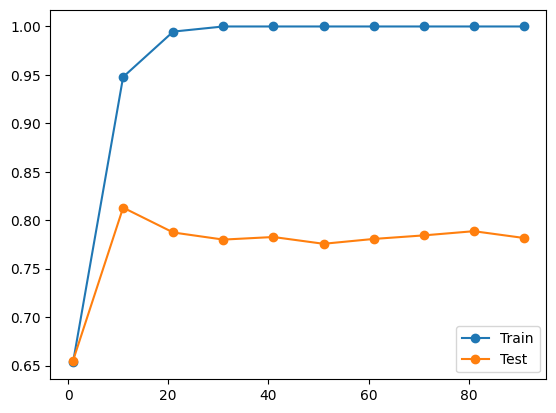

In [6]:
# Gráfico de desempeños:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

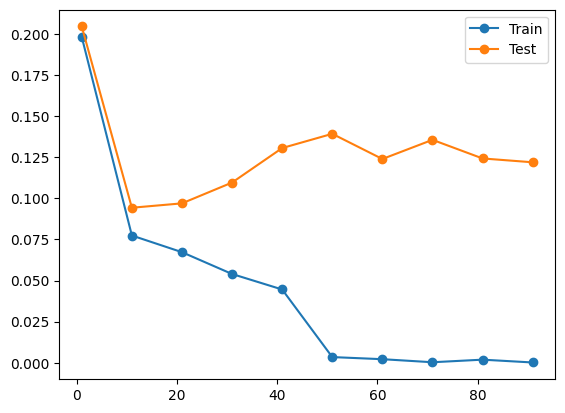

In [13]:
# Gráfico de curvas de aprendizaje de errores
plt.plot(values, train_errors, '-o', label='Train')
plt.plot(values, test_errors, '-o', label='Test')
plt.legend()
plt.show()

In [24]:
model = MLPClassifier(hidden_layer_sizes=(10,),
                      activation='relu',
                      alpha=0.001,
                      learning_rate_init=1000.01,
                      max_iter=500)

model.fit(X_train, y_train)

train_yhat = model.predict(X_train)
test_yhat = model.predict(X_test)

train_performance = f1_score(y_train, train_yhat)
test_performance = f1_score(y_test, test_yhat)

print('Train: %.4f' % train_performance)
print('Test: %.4f' % test_performance)

Train: 0.6701
Test: 0.6643
